<a href="https://colab.research.google.com/github/nicolassalomon96/procesamiento_imagenes_UNS/blob/main/TP2/parte_1_rgb_to_yiq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TP2 Parte Nº1 - Color - Espacios de color RGB e YIQ**

### Presentado: Nicolás Salomón - email: nicolassalomon96@gmail.com

###Consigna: Leer una imagen descargada de internet, llevarla del espacio RGB al espacio YIQ y variar los parámetros de luminancia y saturación. Sacar conclusiones

## 1. Se importan las librerias necesarias

In [36]:
import os
import numpy as np
import imageio
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

## 2. Se monta nuestro Google Drive para acceder a las imagenes descargadas

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 3. Funciones empleadas

In [25]:
#Función para mostrar una imagen
def print_image(image,title):
  fig, ax = plt.subplots(figsize=(15, 15))
  plt.imshow(image)
  plt.title(title)
  plt.show()

#Funcion para crear un botón de guardado
def save_button(image,full_path):
  '''
  input: image=arreglo numpy obtenido luego de leer una imagen
         full_path=ruta completa de guardado (incluido nombre y extensión)
  '''
  #Función para guardar una imagen
  def save_image(image,full_path):
    image = np.uint8(image)
    imageio.imsave(full_path,image)
 
  my_button = widgets.Button(description='SAVE IMAGE')
  out = widgets.Output()

  def on_button_clicked(b):
     with out:
      #Que sucede al presionar el boton
      save_image(image,full_path)      
    
  my_button.on_click(on_button_clicked)
  display(my_button,out)

#Función para convertir una imagen del espacio RGB al YIQ
def rgb2yiq(RGB):
    '''
    input: matriz de la imagen en formato RGB sin normalizar
    output: matriz de la imagen en formato YIQ
    '''
    rgb2yiq_matrix = np.array([[0.299,0.587,0.114],[0.595716,-0.274453,-0.321263],[0.211456,-0.522591,0.311135]])
    #print("Matriz de conversion RGB a YIQ:")
    #print(rgb2yiq_matrix)

    #Se normalizan los valores de RGB entre 0.0 y 1.0
    RGB = RGB/255

    Y = rgb2yiq_matrix[0][0] * RGB[:,:,0] + rgb2yiq_matrix[0][1] * RGB[:,:,1] + rgb2yiq_matrix[0][2] * RGB[:,:,2]
    I = rgb2yiq_matrix[1][0] * RGB[:,:,0] + rgb2yiq_matrix[1][1] * RGB[:,:,1] + rgb2yiq_matrix[1][2] * RGB[:,:,2]
    Q = rgb2yiq_matrix[2][0] * RGB[:,:,0] + rgb2yiq_matrix[2][1] * RGB[:,:,1] + rgb2yiq_matrix[2][2] * RGB[:,:,2]

    YIQ = np.dstack((Y,I,Q))
    
    return YIQ

#Función para convertir una imagen del espacio YIQ al RGB 
def yiq2rgb(YIQ):
    '''
    input: matriz de la imagen en formato YIQ 
    output: matriz de la imagen en formato RGB (en bytes)
    '''
    yiq2rgb_matrix = np.array([[1,0.9663,0.6210],[1,-0.2721,-0.6474],[1,-1.1070,1.7046]])
    #print("Matriz de conversion YIQ a RGB:")
    #print(yiq2rgb_matrix)

    R = yiq2rgb_matrix[0][0] * YIQ[:,:,0] + yiq2rgb_matrix[0][1] * YIQ[:,:,1] + yiq2rgb_matrix[0][2] * YIQ[:,:,2]
    G = yiq2rgb_matrix[1][0] * YIQ[:,:,0] + yiq2rgb_matrix[1][1] * YIQ[:,:,1] + yiq2rgb_matrix[1][2] * YIQ[:,:,2]
    B = yiq2rgb_matrix[2][0] * YIQ[:,:,0] + yiq2rgb_matrix[2][1] * YIQ[:,:,1] + yiq2rgb_matrix[2][2] * YIQ[:,:,2]

    #Se controla que no haya pixeles con valores menores a 0 y mayores a 1 (Dadas las multiplicaciones y sumas realizadas,
    #puede ocurrir que un valor exceda un poco el límite de 255 o sea ligeramente menor a 0 ocasionando errores en la visualización)
    R = np.clip(R, 0, 1)
    G = np.clip(G, 0, 1)
    B = np.clip(B, 0, 1)

    #Se convierten los valores a byte (valores enteros de 0 a 255)
    R = (R*255).astype(int)
    G = (G*255).astype(int)
    B = (B*255).astype(int)    
    
    RGB = np.dstack((R,G,B))
    
    return RGB  

#Función para modificar la luminancia
def mod_luminance(alpha,YIQ, graph=1):
    '''
    input: alpha = coeficiente de luminancia
           YIQ = matriz de la imagen en el espacio YIQ
           graph = mostrar la imagen modificada (1--> SI ; 0---> NO)
    output: matriz de la imagen modificada en el espacio YIQ
    '''
    Y_new = YIQ[:,:,0] * alpha
    #Se controla que la luminancia no sea mayor a 1 para evitar que salga de rango
    for i in range(len(Y_new)):
        for j in range(len(Y_new[i])):
            if Y_new[i][j] > 1:
                Y_new[i][j] = 1
    YIQ_new = np.dstack((Y_new,YIQ[:,:,1],YIQ[:,:,2]))
    
    if graph==1:
      #Se convierte a RGB para graficar        
      rgb_out = yiq2rgb(YIQ_new)

      fig, axs = plt.subplots(1, 1)
      fig.set_size_inches(10,10)
      plt.imshow(rgb_out)
      plt.title(f"Alfa = {alpha}")
      plt.show()

    return YIQ_new

#Funcion para modificar la saturación
def mod_saturation(beta,YIQ,graph=1):
    '''
    input: beta = coeficiente de saturación
           YIQ = matriz de la imagen en el espacio YIQ
           graph = mostrar la imagen modificada (1--> SI ; 0---> NO)
    output: matriz de la imagen modificada en el espacio YIQ
    '''
    I_new = YIQ[:,:,1] * beta
    #Se controla que los resultados esten entre -0.5957 y 0.5957 para evitar salir de rango
    for i in range(len(I_new)):
        for j in range(len(I_new[i])):
            if I_new[i][j] < -0.5957:
                I_new[i][j] = -0.5957
            if I_new[i][j] > 0.5957:
                I_new[i][j] = 0.5957
    
    Q_new = YIQ[:,:,2] * beta
    #Se controla que los resultados esten entre -0.5957 y 0.5957 para evitar salir de rango
    for i in range(len(Q_new)):
        for j in range(len(Q_new[i])):
            if Q_new[i][j] < -0.5226:
                Q_new[i][j] = -0.5226
            if Q_new[i][j] > 0.5226:
                Q_new[i][j] = 0.5226
                
    YIQ_new = np.dstack((YIQ[:,:,0],I_new,Q_new))

    if graph==1:
      #Se convierte a RGB para graficar        
      rgb_out = yiq2rgb(YIQ_new)

      fig, axs = plt.subplots(1, 1)
      fig.set_size_inches(10,10)
      plt.imshow(rgb_out)
      plt.title(f"Beta = {beta}")
      plt.show()

    return YIQ_new


#Función para modificar saturación y luminosidad al mismo tiempo
def mod_sat_lum(alpha, beta, YIQ, graph=1):
  '''
  alpha = coeficiente de luminancia
  beta = coeficiente de saturación
  YIQ = matriz de la imagen en el espacio YIQ
  graph = mostrar la imagen modificada (1--> SI ; 0---> NO)
  '''
  YIQ_mod = mod_luminance(alpha, YIQ, graph=0)
  YIQ_mod = mod_saturation(beta, YIQ_mod, graph=0)

  if graph==1:
    #Se convierte a RGB para graficar        
    rgb_original = yiq2rgb(YIQ)
    rgb_mod = yiq2rgb(YIQ_mod)

    fig, axs = plt.subplots(1, 2, figsize=(25,25))

    plt.subplot(1,2,1)
    plt.imshow(rgb_mod)
    plt.title(f"Imagen Modificada - Alfa = {alpha} - Beta = {beta}")
    
    plt.subplot(1,2,2)
    plt.imshow(rgb_original)
    plt.title(f"Imagen RGB original")
    
    plt.show()

  return YIQ_mod

## 4. Selección de la imagen a modificar

Tamaño de la imagen:(400, 600, 3) (Dado que es una imagen RGB tenemos 3 canales, uno para cada color)



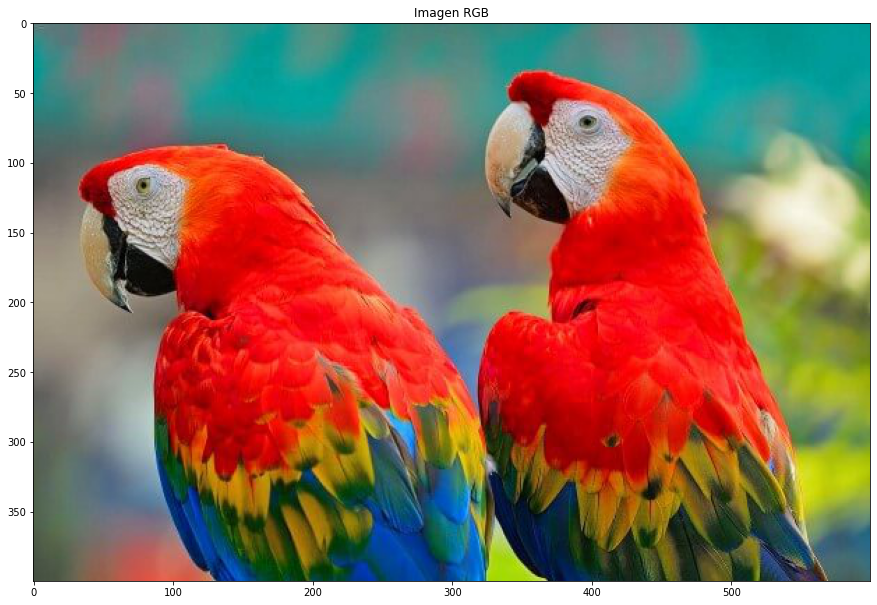

In [39]:
#@title Seleccione la imagen a analizar: { run: "auto" }
isla_path = '/content/drive/MyDrive/Cursos_Posgrado/Procesamiento_Imagenes-UNS/TP2/isla.jpg'
loro_path = '/content/drive/MyDrive/Cursos_Posgrado/Procesamiento_Imagenes-UNS/TP2/loro.jpg'
playa_path = '/content/drive/MyDrive/Cursos_Posgrado/Procesamiento_Imagenes-UNS/TP2/playa.jpg'

dropdown = 'Loro' #@param ["Isla","Loro","Playa"]

if dropdown=='Isla':
  image = image = imageio.imread(isla_path)
if dropdown=='Loro':
  image = image = imageio.imread(loro_path)
if dropdown=='Playa':
  image = image = imageio.imread(playa_path)

print(f"Tamaño de la imagen:{image.shape} (Dado que es una imagen RGB tenemos 3 canales, uno para cada color)\n") 
print_image(image,'Imagen RGB')

## 5. Se controla que las funciones de conversión entre espacios de color funcionen correctamente

Nos aseguramos que las funciones de transformación de espacios de color anteriores estan correctas, transformando la imagen RGB a YIQ y viceversa, y observamos que no haya ninguna alteración en la imagen

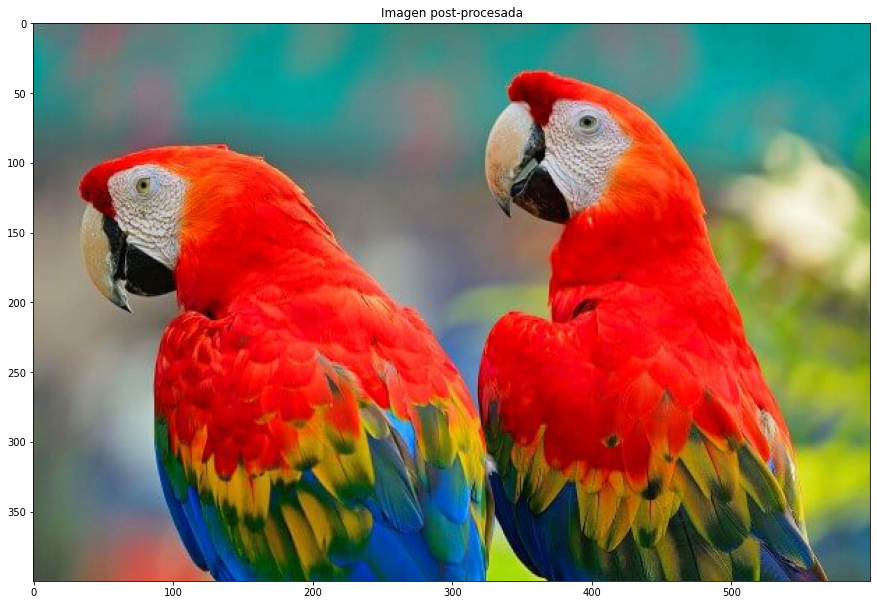

In [40]:
YIQ = rgb2yiq(image)
RGB_out = yiq2rgb(YIQ)

print_image(RGB_out,'Imagen post-procesada')

No se observan cambios con respecto a la imagen original, por lo tanto podemos asegurar que las funciones de conversión entre los espacios RGB e YIQ funcionan correctamente

## 6. Se modifica la luminancia y saturación de manera interactiva

*   Es posible modificar ambos parámetros de forma independiente
*   Para guardar la imagen, configure la ruta donde quiere guardar y presione en boton "SAVE IMAGE"

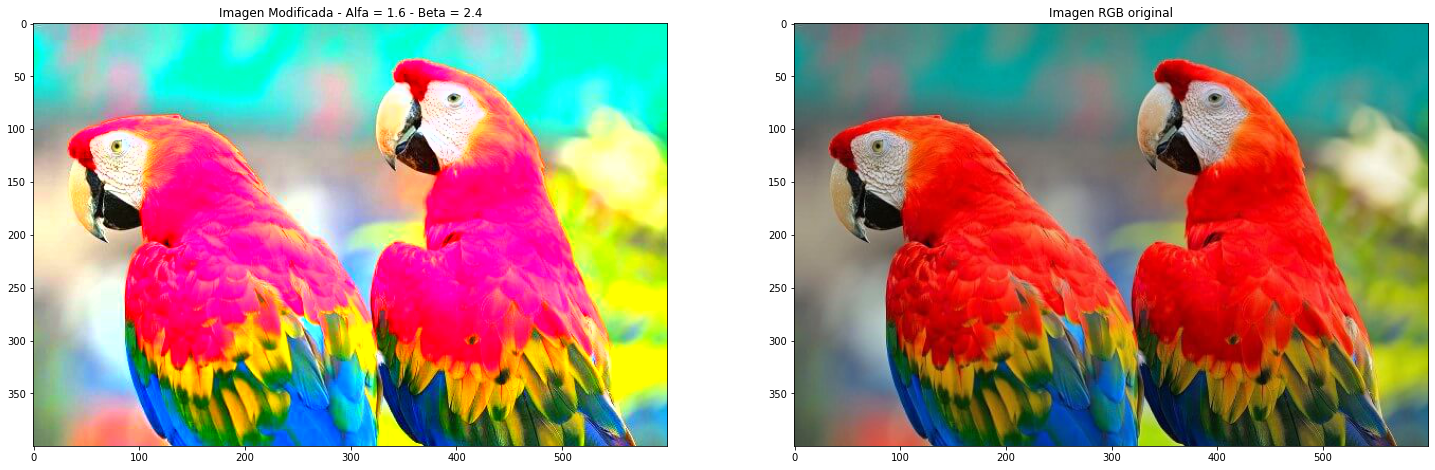

Button(description='SAVE IMAGE', style=ButtonStyle())

Output()

In [46]:
#@title Seleccione el valor de alfa (luminancia) y beta (saturación) para observar el cambio en la imagen seleccionada anteriormente. { run: "auto" }
alpha = 1.6 #@param {type:"slider", min:1, max:3, step:0.1}
beta = 2.4 #@param {type:"slider", min:1, max:3, step:0.1}

#@markdown Path para guardar la imagen modificada:
path = '/content/drive/MyDrive/Cursos_Posgrado/Procesamiento_Imagenes-UNS/TP2/' #@param {type:"string"}
#@markdown Nombre para guardar la imagen modificada:
name = 'loro_modifica' #@param {type:"string"}
#@markdown Path para guardar la imagen modificada presione el botón SAVE IMAGE en la esquina inferior de la imagen
format = '.jpg' #@param [".jpg",".png"]
#@markdown Para guardar la imagen modificada presione el botón SAVE IMAGE en la esquina inferior de la imagen


YIQ_mod = mod_sat_lum(alpha, beta, YIQ)
RGB_mod = yiq2rgb(YIQ_mod)

full_path = os.path.join(path,name + format)
save_button(RGB_mod,full_path)

## 7. Conclusiones

Para sacar conclusiones en base a las infinitas combinaciones posibles para alfa y beta que podemos obtener de la celda anterior, se toman dos valores representativos para alfa y beta.


### 7.1 Luminancia con alfa = 0.5 y 1.8

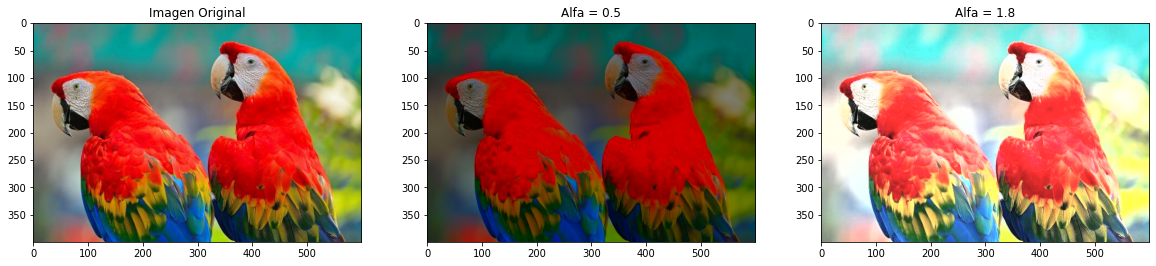

In [47]:
YIQ = rgb2yiq(image)
alfa_1 = 0.5
alfa_2 = 1.8
YIQ_lum1 = mod_luminance(alfa_1,YIQ,graph=0)
YIQ_lum2 = mod_luminance(alfa_2,YIQ,graph=0)

#Se convierte la imagen a RGB para mostrar por pantalla
RGB_lum1 = yiq2rgb(YIQ_lum1)
RGB_lum2 = yiq2rgb(YIQ_lum2)

fig, axs = plt.subplots(1, 3)
fig.set_size_inches(20,20)

plt.subplot(1,3,1)
plt.imshow(image)
plt.title("Imagen Original")

plt.subplot(1,3,2)
plt.imshow(RGB_lum1)
plt.title(f"Alfa = {alfa_1}")

plt.subplot(1,3,3)
plt.imshow(RGB_lum2)
plt.title(f"Alfa = {alfa_2}")

plt.show()

Se observa como las funciones codificadas cumplen su rol correctamente, dado que al colocar un valor menor a 1 en alfa se observa una disminución en la luminosidad de la imagen. Mientras que al colocar un valor cercano a 2, observamos como aumenta el brillo o la claridad de la imagen a tal punto de llegar a "quemar" la imagen.

### 7.2 Saturación con beta = 0, 0.5 y 1.5

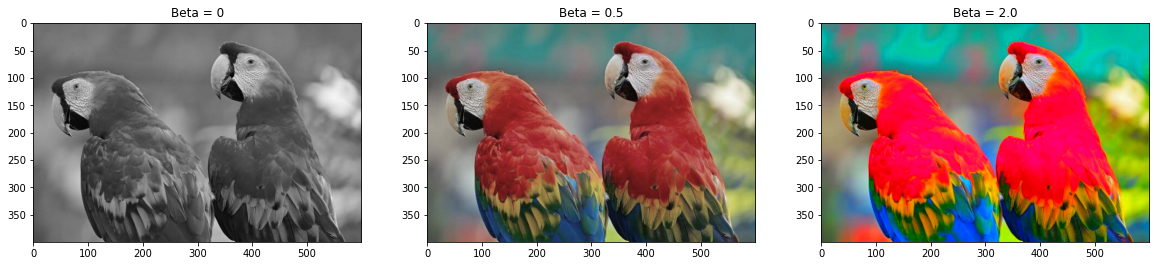

In [48]:
YIQ = rgb2yiq(image)
beta_1 = 0
beta_2 = 0.5
beta_3 = 2.0
YIQ_sat1 = mod_saturation(beta_1,YIQ,graph=0)
YIQ_sat2 = mod_saturation(beta_2,YIQ,graph=0)
YIQ_sat3 = mod_saturation(beta_3,YIQ,graph=0)

#Se convierte la imagen a RGB para mostrar por pantalla
RGB_sat1 = yiq2rgb(YIQ_sat1)
RGB_sat2 = yiq2rgb(YIQ_sat2)
RGB_sat3 = yiq2rgb(YIQ_sat3)

fig, axs = plt.subplots(1, 3)
fig.set_size_inches(20,20)

plt.subplot(1,3,1)
plt.imshow(RGB_sat1)
plt.title(f"Beta = {beta_1}")

plt.subplot(1,3,2)
plt.imshow(RGB_sat2)
plt.title(f"Beta = {beta_2}")

plt.subplot(1,3,3)
plt.imshow(RGB_sat3)
plt.title(f"Beta = {beta_3}")

plt.show()

Se observa el correcto funcionamiento de las funciones programadas para la variación en la saturación de la imagen. Vemos como para un coeficiente de saturación igual a 0, la imagen pierde cualquier nivel de saturación que poseía, convirtiéndose en una imagen en blanco y negro.
Por otro lado, al aumentar demasiado el coeficiente de saturación *beta* observamos una imagen con los colores demasiados saturados.